In [2]:
from dqnotebook import QuadraticDrawer
%matplotlib notebook
import matplotlib as mpl
mpl.use("pgf")
from matplotlib.collections import LineCollection
from scipy.integrate import odeint
import sys
import numpy as np
from cmath import *
from obj import Monodromy, QuadraticDifferential, integrar, fase_silla
pgf_with_pdflatex = {
    "pgf.texsystem": "pdflatex"
}
mpl.rcParams.update(pgf_with_pdflatex)
mpl.rcParams['lines.linewidth'] = 10
import matplotlib.pyplot as plt

In [3]:
lim = 100
maxreps = 50000
maxint = 100
t= np.linspace(0,.5,2) #intervalo temporal
normav = 0.001
ri=sqrt(1j)
ric=sqrt(-1j)

In [4]:
class TrajectorySolver:
    """clase que representa una trayectoria y los metodos para calcularla"""

    def __init__(self, quad, plotpoint, spacing=.3, longmax = 100, phase = None):
        self.qd = quad
        if phase: self._phase = phase
        else: self._phase = quad.phase
        self.plotpoint = plotpoint
        self.first = plotpoint
        self.last = plotpoint
        self.first_mon = Monodromy(quad(plotpoint).conjugate())
        self.last_mon = Monodromy(quad(plotpoint).conjugate())
        self.coordinates = np.array([[plotpoint.real, plotpoint.imag]])
        self.spacing=spacing
        self.longmax = longmax

    def __call__(self):
        if self._phase != self.qd.phase:
            phase_old= self.qd.phase
            self.qd.phase=self._phase
        else:
            phase_old = self._phase
        if self.first == self.last:
            self.tp()
            self.tn()
            sys.stdout.write(".")
            sys.stdout.flush()
        self.qd.phase=phase_old
        return self.coordinates

    def traject(self, sign, mon, z):
        norma = 0.5
        coord = np.array([[z.real, z.imag]])
        rep = 0
        fin = z
        inicio = z
        ultimo = 0.0
        start = z
        longitud = 0.0
        F = lambda y,t,mono: [sign*self.f(y,t,mono)[0],sign*self.f(y,t,mono)[1],normav*abs(sqrt(self.qd.QD(complex(y[0],y[1]))))]
#        F = lambda y,t,mono: [sign*self.f(y,t,mono)[0],sign*self.f(y,t,mono)[1],normav]
        while (self.qd.close_2pole(fin) and self.qd.close_2smplpole(fin) and norma < lim and rep < maxreps):
            sol = odeint(F, [inicio.real, inicio.imag, longitud], t, mxstep = maxint, args=(mon,))
            fin = complex(sol[-1,0], sol[-1,1])
            mon(self.qd(fin).conjugate())
            longitud = sol[-1,2]
            if self.spacing < longitud-ultimo:
                coord = np.append(coord, np.array([[fin.real, fin.imag]]), axis = 0)
                ultimo = longitud
                #ultimo = fin
            if self.longmax < longitud:
                break
            inicio = fin
            norma = abs(inicio)
            if 50 < rep and 0.01 > abs(fin-start):
                break
            rep += 1
        print longitud
        return coord

    def tp(self):
        self.coordinates = np.vstack((self.coordinates,  self.traject(1, self.last_mon, self.last)))
        self.last=complex(self.coordinates[-1][0], self.coordinates[-1][1])
        return

    def tn(self):
        self.coordinates = np.vstack((self.traject(-1, self.first_mon, self.first)[::-1], self.coordinates))
        self.first=complex(self.coordinates[0][0], self.coordinates[0][1])
        return

    def f(self, y, t, mono):
        x = y[0]
        y = y[1]
        z = mono.dist(self.qd(complex(x,y)).conjugate())
        z *= normav
        #if abs(complex(x, y)) > 1:
        #    z *= abs(complex(x,y))
        return [z.real, z.imag]
   

In [5]:
def mid_point_saddle(z,w,quad):
    longitud_silla=integrar(z,w,quad)
    mid_lenght=abs(longitud_silla)/2
    start=z+(w-z)*0.00001
    fase=fase_silla(z,w,quad)
    solver=TrajectorySolver(quad,start,mid_lenght,mid_lenght,fase)
    puntos=solver()
    mid_point=complex(puntos[-1][0],puntos[-1][1])
    return mid_point

In [6]:
quad=QuadraticDifferential()

In [ ]:
quad_sillas=QuadraticDifferential()

<IPython.core.display.Javascript object>


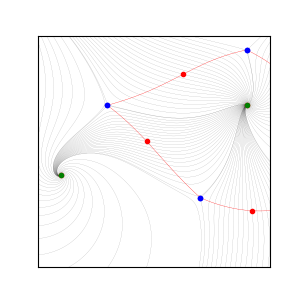

In [54]:
fig=plt.figure()

In [55]:
quad_drawer=QuadraticDrawer(quad,fig,.05)
limite= 2
#quad_drawer.ax.set_ylim(-1*limite,limite)
#quad_drawer.ax.set_xlim(-1*limite,limite)
quad_drawer.ax.set_ylim(-3.5,1.5)
quad_drawer.ax.set_xlim(-2.5,2.5)
fig.set_size_inches(3,3)
plt.axis('on')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

In [ ]:
quad_drawer_sillas=QuadraticDrawer(quad_sillas,fig,.1)
limite= 3
#quad_drawer.ax.set_ylim(-1*limite,limite)
#quad_drawer.ax.set_xlim(-1*limite,limite)
quad_drawer.ax.set_ylim(-3.5,1.5)
quad_drawer.ax.set_xlim(-2.5,2.5)
fig.set_size_inches(5,5)
plt.axis('on')
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

In [60]:
mm=draw_saddle(quad,fig,z4,z3)

0.0729953137336
0.0729759276544
.0.0733381853428
0.0733381633476
.

In [ ]:
mm[0].plotpoints

In [ ]:
quad_drawer.trajectories.set_color([(.5,.5,.5)])

In [ ]:
quad_drawer_sillas.trajectories.set_color([(1,0,0)])

In [61]:
#quad.zeros=[complex(0,0)]
z1=complex(-1,0)
z2=complex(1,-2)
z3=complex(2,1.2)
z4=complex(3.5,-2)
w1 = complex(-2,-4)
w2 = complex(-4,0)
quad.dblpoles = [complex(-3.3,2.3),complex(3.1,3),complex(-2,-1.5),complex(2,0)]
quad.zeros = [z1,z2 ,z3,z4]
quad.plotpoints = []
for x in quad.zeros:
    plt.plot([x.real],[x.imag],'bo',ms=3,)
for x in quad.dblpoles:
    plt.plot([x.real],[x.imag],'go',ms=3,)

In [53]:
def draw_saddle(quad, fig, z1, z2, color='r'):
    mid = mid_point_saddle(z1,z2,quad)
    plt.plot([mid.real],[mid.imag],'ro',ms=3)
    fase = fase_silla(z1,z2,quad)
    quad_silla = QuadraticDifferential(quad)
    quad_silla.phase = fase
    quad_silla.plotpoints = [mid]
    longitud_silla=abs(integrar(z1,z2,quad))/2.01
    drawer = QuadraticDrawer(quad_silla,fig)
    drawer.trajectories.set_color(color)
    t= TrajectorySolver(quad_silla,mid, longitud_silla/100, longitud_silla*1.01, fase)
    segmentos = t()
    drawer.trajectories.set_segments([segmentos])
    return [quad_silla, drawer]

In [ ]:
#quad.zeros=[complex(0,0)]
quad_sillas.dblpoles = [complex(-3.3,2.3),complex(3.1,3),complex(-2,-1.5),complex(2,0)]
quad_sillas.zeros = [z1,z2 ,z3,z4]
quad_sillas.plotpoints = [m1]
quad_sillas.phase=fase1

In [ ]:
quad_drawer_sillas.draw_trajectories()

In [63]:
plt.savefig('franja_silla3_chica.pgf')

In [18]:
m1=mid_point_saddle(z1,z2,quad)
fase1=fase_silla(z1,z2,quad)
longitud_silla1=abs(integrar(z1,z2,quad))/2.01
solver1 = TrajectorySolver(quad,m1,longitud_silla1/10,longitud_silla1*1.1,fase1)
puntos1=solver1()
for x in range(puntos1.shape[0]):
    quad.add_plotpoint(complex(puntos1[x][0],puntos1[x][1]))

0.0469203282732
0.0469582588207
.0.0513587329371
0.0513549252202
.

In [19]:
m2=mid_point_saddle(z1,z3,quad)
fase2=fase_silla(z1,z3,quad)
longitud_silla2=abs(integrar(z1,z3,quad))/2.01
solver2 = TrajectorySolver(quad,m2,longitud_silla2/10,longitud_silla2*1.1,fase2)
puntos2=solver2()
for x in range(puntos2.shape[0]):
    quad.add_plotpoint(complex(puntos2[x][0],puntos2[x][1]))

0.0901865579758
0.0902157154673
.0.0986941210298
0.0986980245145
.

In [20]:
m3=mid_point_saddle(z2,z4,quad)
fase3=fase_silla(z2,z4,quad)
longitud_silla3=abs(integrar(z2,z4,quad))/2.01
solver3 = TrajectorySolver(quad,m3,longitud_silla3/10,longitud_silla3*1.1,fase3)
puntos3=solver3()
for x in range(puntos3.shape[0]):
    quad.add_plotpoint(complex(puntos3[x][0],puntos3[x][1]))

0.012927179042
3.20725251504e-07
.0.0141497300598
0.0141507981363
.

In [21]:
m4=mid_point_saddle(z4,z3,quad)
fase4=fase_silla(z4,z3,quad)
longitud_silla4=abs(integrar(z4,z3,quad))/2.01
solver4 = TrajectorySolver(quad,m4,longitud_silla4/10,longitud_silla4*1.1,fase4)
puntos4=solver4()
for x in range(puntos4.shape[0]):
    quad.add_plotpoint(complex(puntos4[x][0],puntos4[x][1]))

0.0729953137336
0.0729759276544
.0.0798769689739
0.0798774886613
.

In [22]:
long_pasos1 = integrar(z2,w1,quad)
long_pasos2 = integrar(w1,w2,quad)
long_pasos3 = integrar(w2,z1,quad)

In [ ]:
long_pasos1

In [ ]:
long_pasos2

In [ ]:
long_pasos3

In [23]:
long_pasos=long_pasos1-long_pasos2+long_pasos3

In [24]:
fase_pasos = long_pasos/abs(long_pasos)
fase_pasos = fase_pasos**2
fase_pasos = fase_pasos.conjugate()

In [25]:
mid_lenght=abs(long_pasos)/2
start=z2+(w1-z2)*0.00001
solver_pasos=TrajectorySolver(quad,start,mid_lenght,mid_lenght,fase_pasos)
puntos_pasos=solver_pasos()
mid_point=complex(puntos_pasos[-1][0],puntos_pasos[-1][1])

0.278975141545
0.278974985541
.

In [ ]:
plt.plot([mid_point.real],[mid_point.imag],'ko')

In [26]:
longitud_pasoss=abs(long_pasos)/2.01
solver_pasoss = TrajectorySolver(quad,mid_point,longitud_pasoss/10,longitud_pasoss*1.1,fase_pasos)
puntos_pasoss=solver_pasoss()
for x in range(puntos_pasoss.shape[0]):
    quad.add_plotpoint(complex(puntos_pasoss[x][0],puntos_pasoss[x][1]))
    #plt.plot([puntos_pasoss[x][0]],[puntos_pasoss[x][1]],'go')

0.305314500094
0.305322198363
.

In [62]:
quad_drawer.draw_trajectories()

In [ ]:
plt.savefig('franja4.pgf')